In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random
from scipy.interpolate import splrep, BSpline
# set plot resolution
dpi = 200

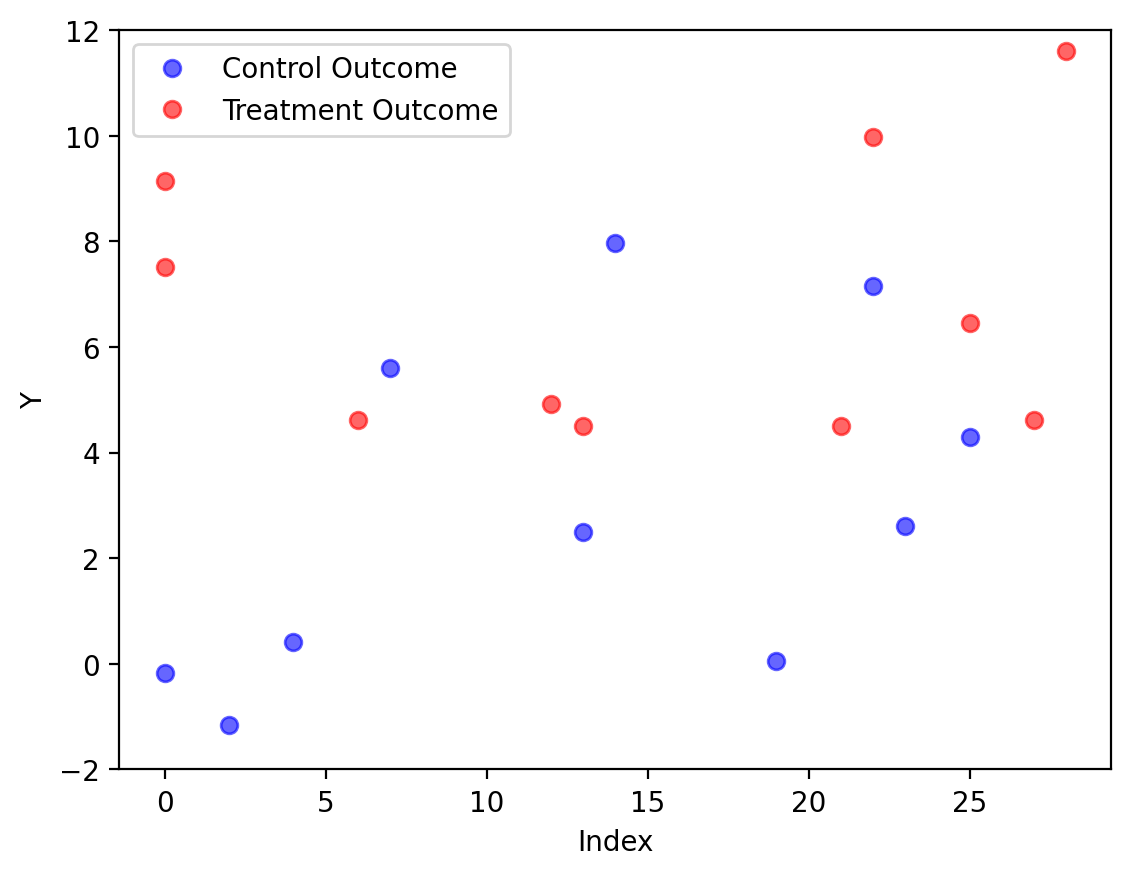

In [2]:
plt.figure(dpi=dpi)
np.random.seed(1)
random.seed(1)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
def exp_data(x):
    return 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
y = exp_data(x)
te = 2
small_sample_size = 10
strong_alpha = 0.6
weak_alpha = 0.2
control_idx = random.choices(range(n),k=small_sample_size)
treat_idx = random.choices(range(n), k=small_sample_size)
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te
random.shuffle(control_y)
random.shuffle(treat_y)
plt.plot(control_idx, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_idx, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
#plt.plot(control_x, np.ones(n//2) * np.mean(treat_y), 'o',fillstyle='none',color = 'red',label='Est. Treatment Outcome')
#plt.plot(treat_x, np.ones(n//2) * np.mean(control_y), 'o',fillstyle='none',color='blue',label='Est. Control Outcome')
#plt.plot(x_f, y_f, color = 'black')
#plt.plot(x_f, y_f+te, color = 'grey')
#plt.axhline(np.mean(control_y), linestyle='--', color='blue')
#plt.axhline(np.mean(treat_y), linestyle='--', color='red')
plt.ylim([-2,12])
plt.ylabel("Y")
plt.xlabel("Index")
plt.legend()
plt.savefig("plots/Simulated_y_indx.png")
plt.show()

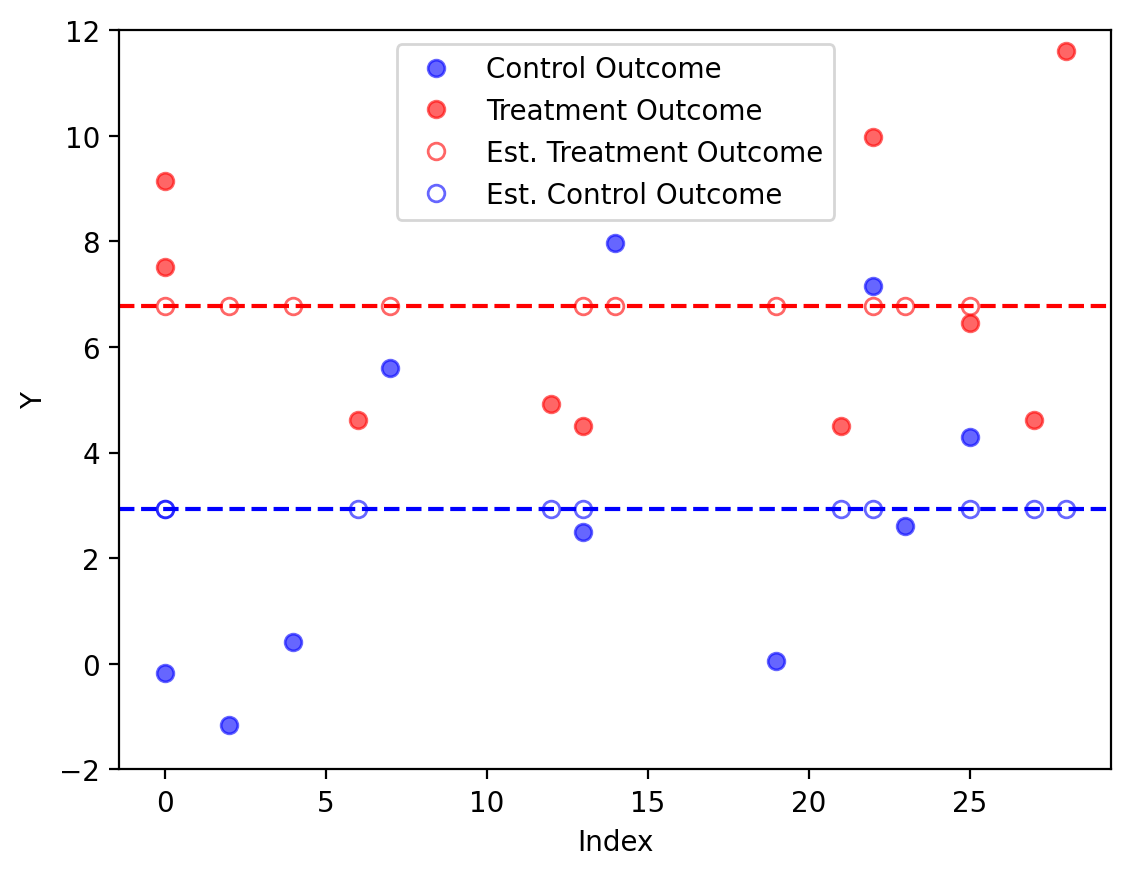

3.8562584934715662 1.2505281989362327


In [3]:
plt.figure(dpi=dpi)
plt.plot(control_idx, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_idx, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
plt.plot(control_idx, np.ones(small_sample_size) * np.mean(treat_y), 'o',fillstyle='none',color = 'red',label='Est. Treatment Outcome',alpha=strong_alpha)
plt.plot(treat_idx, np.ones(small_sample_size) * np.mean(control_y), 'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=strong_alpha)
#plt.plot(x_f, y_f, color = 'black')
#plt.plot(x_f, y_f+te, color = 'grey')
plt.axhline(np.mean(control_y), linestyle='--', color='blue')
plt.axhline(np.mean(treat_y), linestyle='--', color='red')
plt.ylim([-2,12])
plt.ylabel("Y")
plt.xlabel("Index")
plt.legend()
plt.savefig("plots/Constant_poe.png")
plt.show()
# covariate accounted for here
ATE = np.mean(treat_y) - np.mean(control_y)
SE = (np.var(treat_y)/len(treat_y) + np.var(control_y)/len(control_y))**0.5
print(ATE,SE)

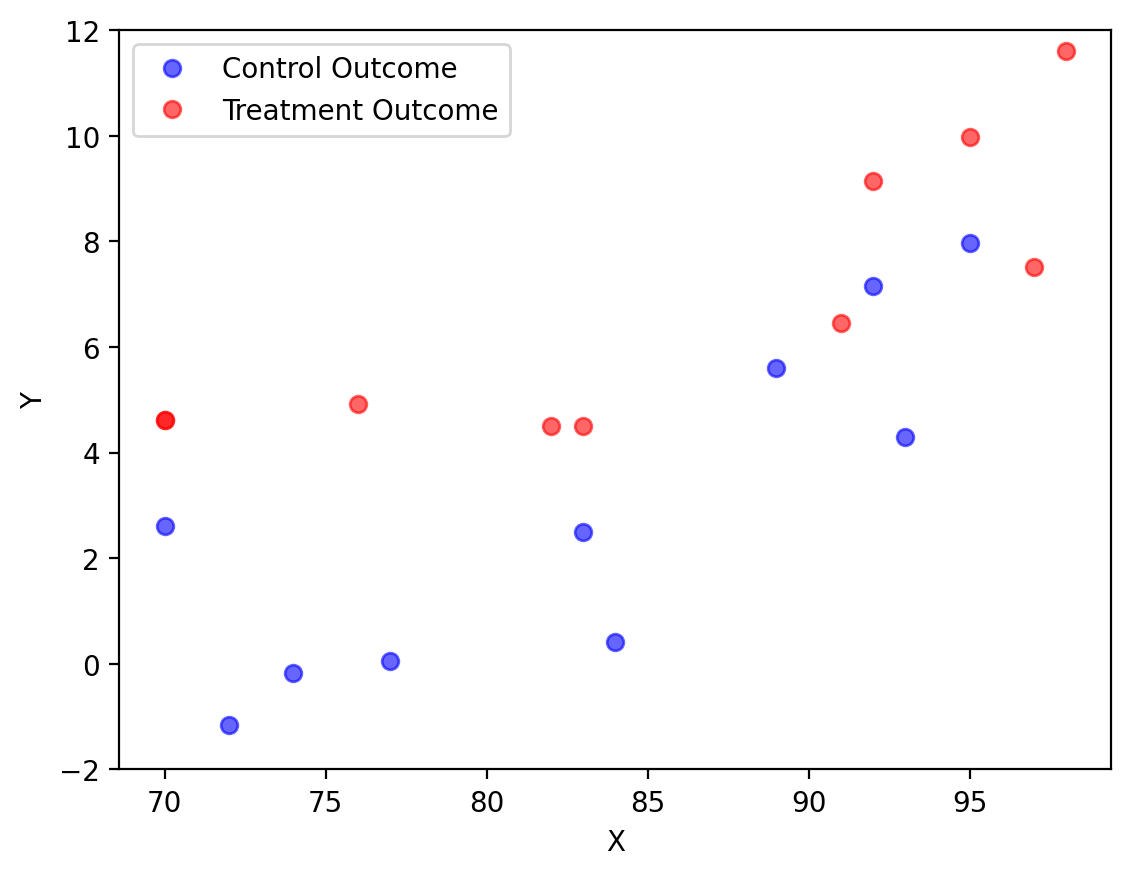

ATE:  3.194459064959803 SE:  0.74128581147984


In [4]:
# calculate optimal beta
plt.figure(dpi=dpi)
np.random.seed(1)
random.seed(1)
control_idx = random.choices(range(n),k=small_sample_size)
treat_idx = random.choices(range(n), k=small_sample_size)
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te
treatxvar = np.var(treat_x)
controlxvar = np.var(control_x)
treatxcov = np.cov(treat_x, treat_y)[0,1]
controlxcov = np.cov(control_x, control_y)[0,1]
beta = (treatxcov + controlxcov)/(treatxvar + controlxvar)
alpha1 = np.mean(treat_y) - np.mean(treat_x)*beta
alpha0 = np.mean(control_y) - np.mean(control_x)*beta
treatline = alpha1 + x * beta
controlline = alpha0 + x * beta
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
#plt.plot(x_f, y_f, color = 'black')
#plt.plot(x_f, y_f+te, color = 'grey')
#plt.plot(x, controlline, linestyle='--', color='blue')
#plt.plot(x, treatline, linestyle='--', color='red')
#plt.plot(control_x, alpha1 + control_x * beta, 'o',fillstyle='none',color = 'red',label='Est. Treatment Outcome',alpha=0.5)
#plt.plot(treat_x, alpha0 + treat_x * beta, 'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=0.5)
plt.ylim([-2,12])
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.savefig("plots/Simulated_y_reg_points.png")
plt.show()
ATE = alpha1 - alpha0
SE = (np.var(treat_y - treat_x * beta)/len(treat_y) + np.var(control_y - control_x * beta)/len(control_y))**0.5
print("ATE: ", ATE, "SE: ", SE)

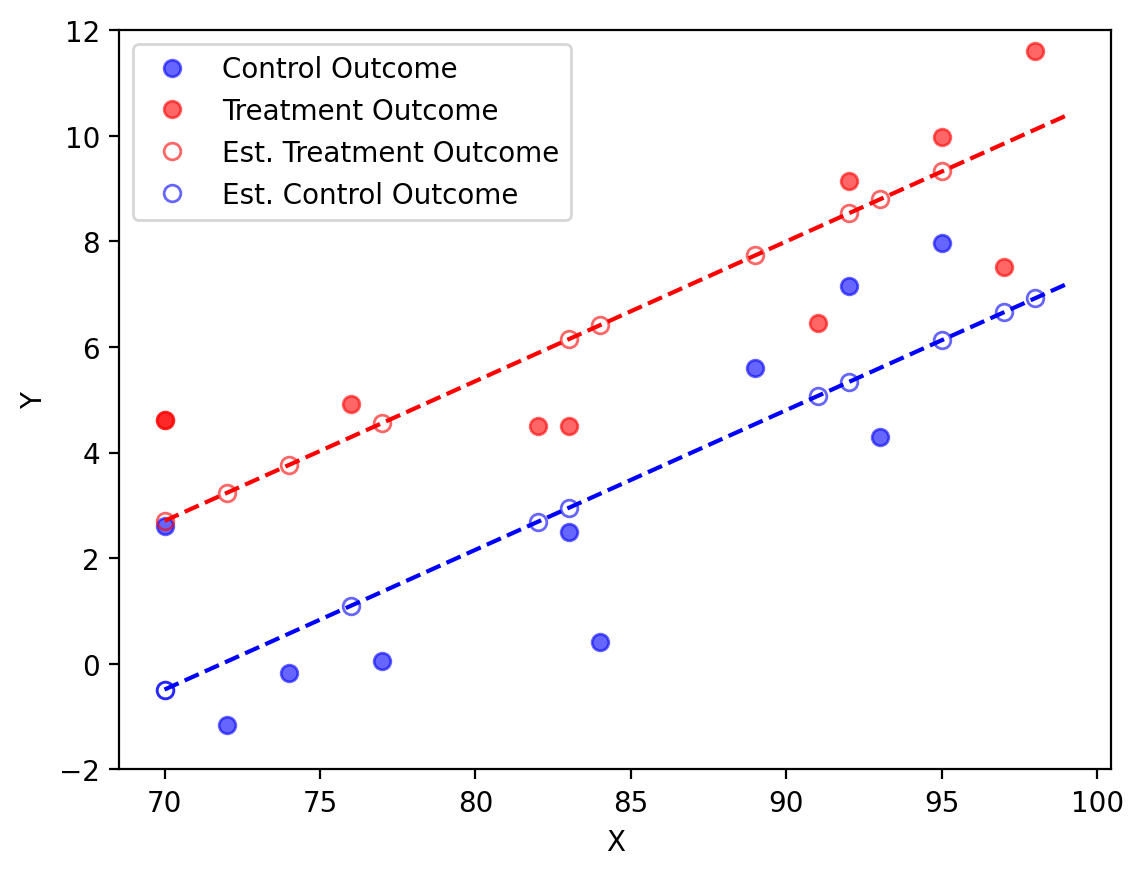

ATE:  3.194459064959803 SE:  0.74128581147984


In [5]:
# calculate optimal beta
plt.figure(dpi=dpi)
np.random.seed(1)
random.seed(1)
control_idx = random.choices(range(n),k=small_sample_size)
treat_idx = random.choices(range(n), k=small_sample_size)
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te
treatxvar = np.var(treat_x)
controlxvar = np.var(control_x)
treatxcov = np.cov(treat_x, treat_y)[0,1]
controlxcov = np.cov(control_x, control_y)[0,1]
beta = (treatxcov + controlxcov)/(treatxvar + controlxvar)
alpha1 = np.mean(treat_y) - np.mean(treat_x)*beta
alpha0 = np.mean(control_y) - np.mean(control_x)*beta
treatline = alpha1 + x * beta
controlline = alpha0 + x * beta
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
#plt.plot(x_f, y_f, color = 'black')
#plt.plot(x_f, y_f+te, color = 'grey')
plt.plot(x, controlline, linestyle='--', color='blue')
plt.plot(x, treatline, linestyle='--', color='red')
plt.plot(control_x, alpha1 + control_x * beta, 'o',fillstyle='none',color = 'red',label='Est. Treatment Outcome',alpha=strong_alpha)
plt.plot(treat_x, alpha0 + treat_x * beta, 'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=strong_alpha)
plt.ylim([-2,12])
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.savefig("plots/Simulated_y_regression.png")
plt.show()
ATE = alpha1 - alpha0
SE = (np.var(treat_y - treat_x * beta)/len(treat_y) + np.var(control_y - control_x * beta)/len(control_y))**0.5
print("ATE: ", ATE, "SE: ", SE)

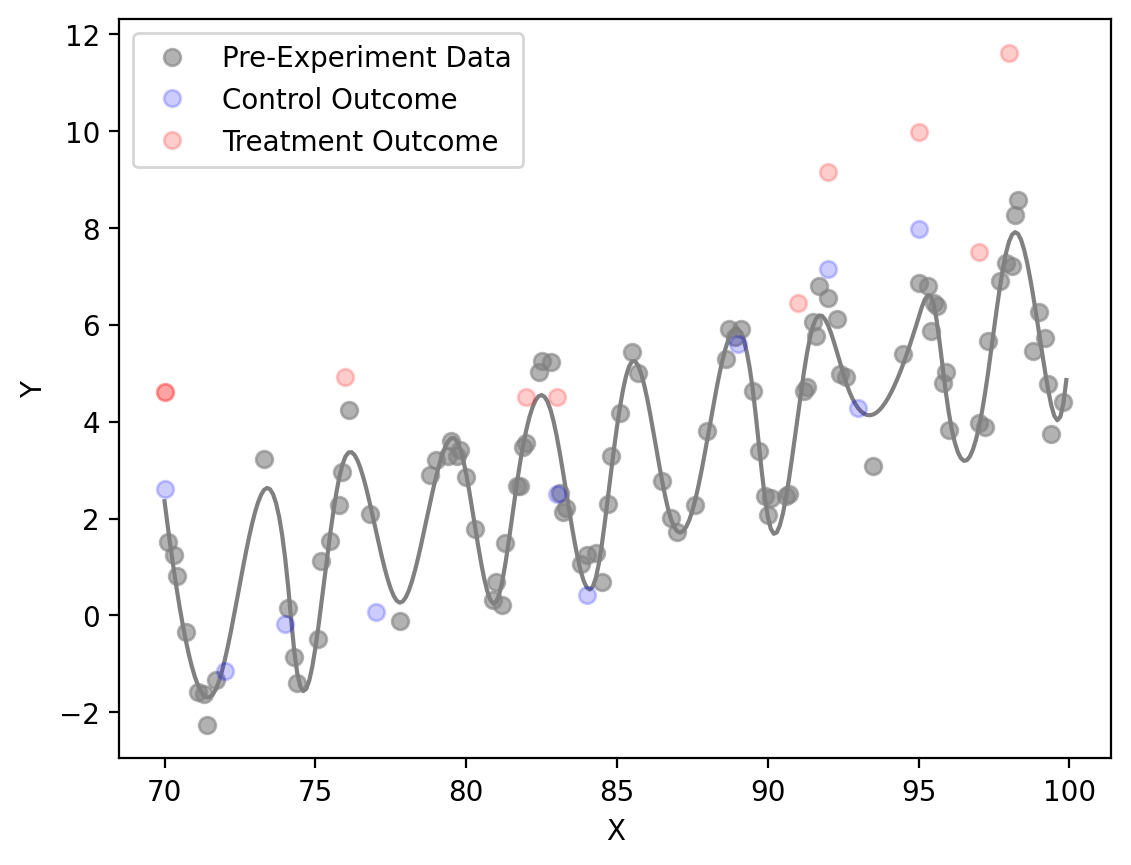

In [6]:
# use the same control/treatment data as the linear model example
plt.figure(dpi=dpi)
np.random.seed(1)
random.seed(1)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
def exp_data(x):
    return 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
y = exp_data(x)
te = 2
control_idx = random.choices(range(n),k=small_sample_size)
treat_idx = random.choices(range(n), k=small_sample_size)
control_idx.sort()
treat_idx.sort()
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te

def pre_exp(x):
    return 2*np.sin(x*2) + 0.2*((x - 70))
x = np.arange(70,100,0.1)
y = pre_exp(x)
#plt.plot(x,y, label = 'ML Predictions',color='grey')
x_pre = np.array(random.sample(list(np.arange(70,100,0.1)), 100))
x_pre.sort()
y_pre = pre_exp(x_pre) + np.random.normal(0,1,len(x_pre)) * 0.5
tck = splrep(x_pre, y_pre, s=20)
plt.plot(x_pre, y_pre, 'o',color='grey',label="Pre-Experiment Data",alpha=strong_alpha)
plt.plot(x,BSpline(*tck)(x),color='grey')
#x2 = np.arange(70,100,0.1)
#y2 = pre_exp(x2)
#plt.plot(x2,y2,color='chocolate',label='Predictions from Pre-Experiment Data')
#plt.axvline(70,color='black',linestyle='--')
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=weak_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=weak_alpha)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc='upper left')
plt.savefig("plots/preexp_preds.png")

ATE: 2.6158713925852037 SE: 0.48458074407217466


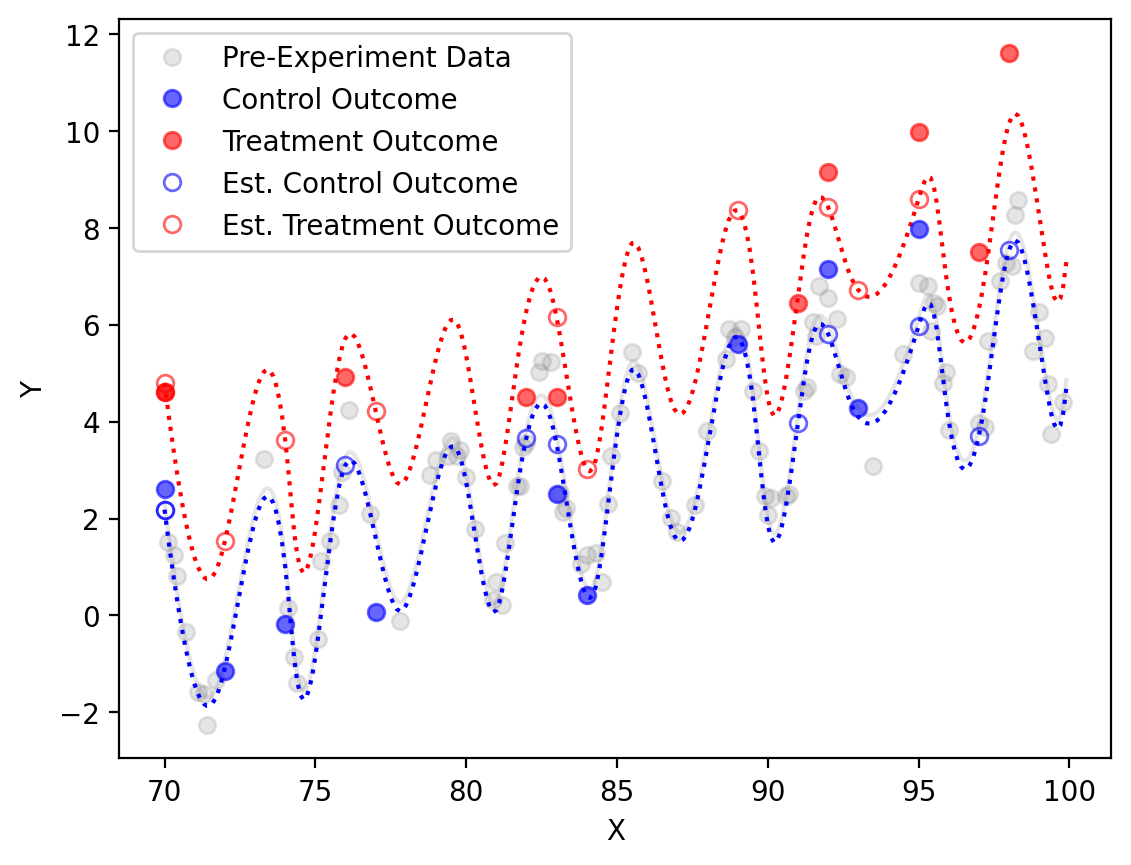

In [7]:
plt.figure(dpi=dpi)
alpha1 = np.mean(treat_y - BSpline(*tck)(treat_x))
alpha0 = np.mean(control_y - BSpline(*tck)(control_x))
treat_line = alpha1 + BSpline(*tck)(x)
control_line = alpha0 + BSpline(*tck)(x)
plt.plot(x,BSpline(*tck)(x), color='grey',alpha=weak_alpha)
plt.plot(x_pre, y_pre, 'o',color='grey',label="Pre-Experiment Data",alpha=weak_alpha)
#plt.plot(x2,y2,color='chocolate',label='Predictions from Pre-Experiment Data')
plt.plot(x,treat_line, color='red',linestyle='dotted',alpha=1)
plt.plot(x,control_line, color='blue',linestyle='dotted',alpha=1)
#plt.axvline(70,color='black',linestyle='--')
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
plt.plot(treat_x, alpha0 + BSpline(*tck)(treat_x),'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=strong_alpha)
plt.plot(control_x, alpha1 + BSpline(*tck)(control_x),'o',fillstyle='none',color='red',label='Est. Treatment Outcome',alpha=strong_alpha)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc='upper left')
plt.savefig("plots/preexp_cf.png")
ATE = alpha1 - alpha0
SE = (np.var(treat_y - BSpline(*tck)(treat_x))/len(treat_y) + np.var(control_y - BSpline(*tck)(control_x))/len(control_y))**0.5
print("ATE:",ATE,"SE:",SE)

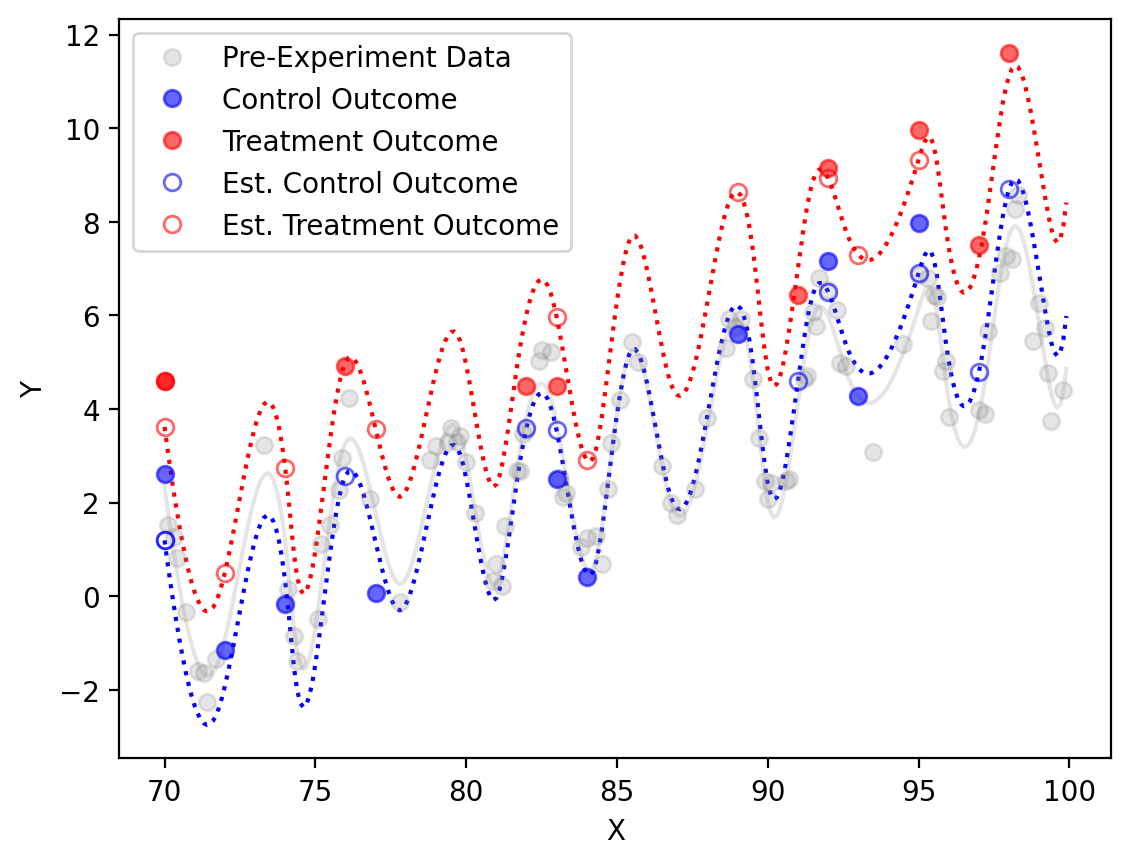

ATE:  2.4242533008187745 SE:  0.3870197777934944


In [8]:
# use the same control/treatment data as the linear model example
plt.figure(dpi=dpi)
np.random.seed(1)
random.seed(1)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
def exp_data(x):
    return 2*np.sin(x*2) + 0.01*((x - 70)**2) + 0.4*error
y = exp_data(x)
te = 2
control_idx = random.choices(range(n),k=small_sample_size)
treat_idx = random.choices(range(n), k=small_sample_size)
control_idx.sort()
treat_idx.sort()
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te
treat_pred = BSpline(*tck)(treat_x)
control_pred = BSpline(*tck)(control_x)

treatxvar = np.var(treat_x)
controlxvar = np.var(control_x)
control_r = control_y - control_pred
treat_r = treat_y - treat_pred
treatxcov = np.cov(treat_x, treat_r)[0,1]
controlxcov = np.cov(control_x, control_r)[0,1]
beta = (treatxcov + controlxcov)/(treatxvar + controlxvar)
alpha1 = np.mean(treat_r) - np.mean(treat_x)*beta
alpha0 = np.mean(control_r) - np.mean(control_x)*beta

x = np.arange(70,100,0.1)
treatline = BSpline(*tck)(x) + alpha1 + x * beta
controlline = BSpline(*tck)(x) + alpha0 + x * beta
plt.plot(x,treatline, color='red',linestyle='dotted')
plt.plot(x,controlline, color='blue',linestyle='dotted')
plt.plot(x,BSpline(*tck)(x), color='grey',alpha=weak_alpha)
plt.plot(x_pre, y_pre, 'o',color='grey',label="Pre-Experiment Data",alpha=weak_alpha)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
plt.plot(treat_x, alpha0 + treat_x * beta + BSpline(*tck)(treat_x),'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=strong_alpha)
plt.plot(control_x, alpha1 + control_x * beta + BSpline(*tck)(control_x),'o',fillstyle='none',color='red',label='Est. Treatment Outcome',alpha=strong_alpha)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc=2)
plt.savefig("plots/sec_cf.png")
plt.show()
ATE = alpha1 - alpha0
SE = (np.var(treat_y - BSpline(*tck)(treat_x) - treat_x * beta)/len(treat_y) + np.var(control_y - BSpline(*tck)(control_x) - control_x * beta)/len(control_y))**0.5
print("ATE: ", ATE, "SE: ", SE)

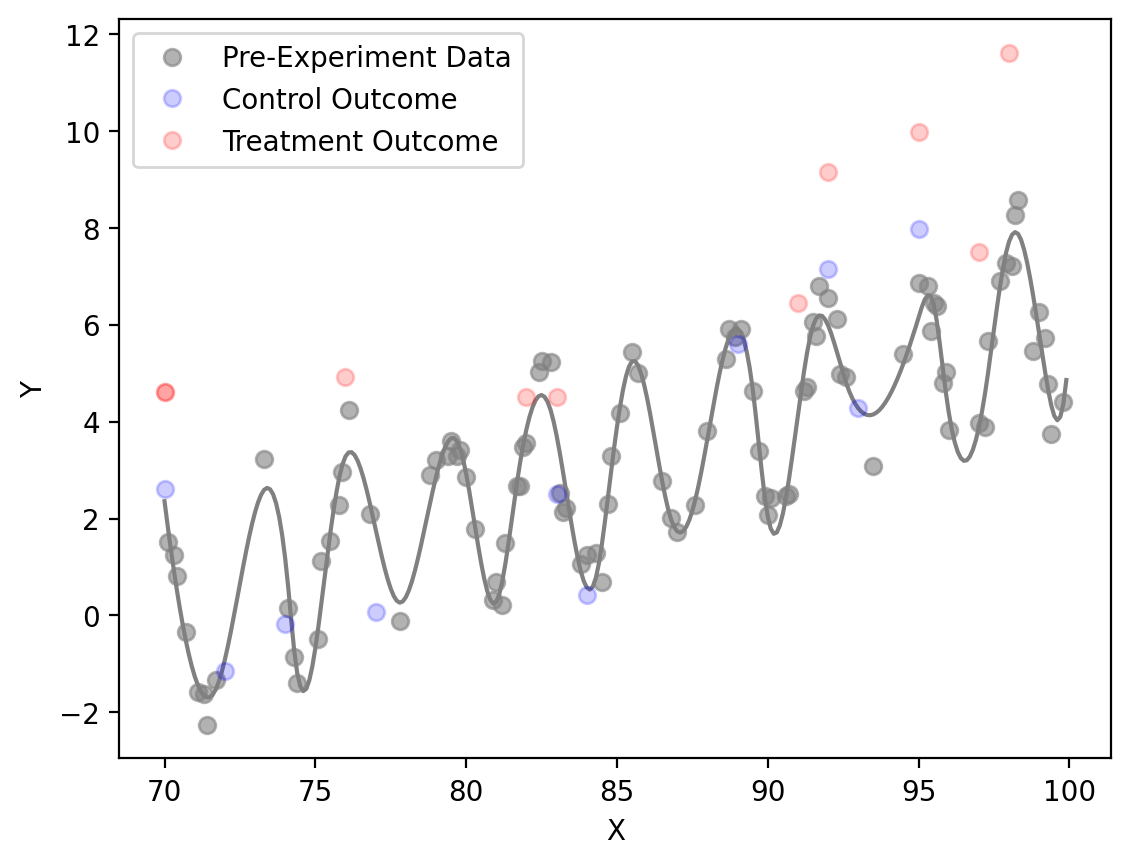

In [9]:
plt.figure(dpi=dpi)
#plt.plot(x,treatline, color='red',linestyle='--',alpha=0.2)
#plt.plot(x,controlline, color='blue',linestyle='--',alpha=0.2)
plt.plot(x,BSpline(*tck)(x), color='grey',alpha=1)
plt.plot(x_pre, y_pre, 'o',color='grey',label="Pre-Experiment Data",alpha=strong_alpha)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=weak_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=weak_alpha)
#plt.plot(treat_x, alpha0 + treat_x * beta + BSpline(*tck)(treat_x),'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=0.2)
#plt.plot(control_x, alpha1 + control_x * beta + BSpline(*tck)(control_x),'o',fillstyle='none',color='red',label='Est. Treatment Outcome',alpha=0.2)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc=2)
plt.savefig("plots/sec_preexp.png")
plt.show()

In [10]:
np.random.seed(1)
random.seed(1)
sim_num = 10000
sample_sizes = {1: 10, 2: 40, 3:80}
res = {}
# define the original x and y (without treatment)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = exp_data(x)
te = 2
for key in sample_sizes:
    temp = []
    n0 = sample_sizes[key]
    n1 = sample_sizes[key]
    for i in range(sim_num):
        #control_idx = random.sample(range(n),n//2)
        #treat_idx = list(set(range(n)).difference(control_idx))
        # or if with replacement
        control_idx = random.choices(range(n), k=n0)
        treat_idx = random.choices(range(n), k=n1)
        control_idx.sort()
        treat_idx.sort()
        control_x = x[control_idx]
        treat_x = x[treat_idx]
        control_y = y[control_idx]
        treat_y = y[treat_idx] + te

        # perform difference in means
        two_est = np.mean(treat_y) - np.mean(control_y)
        two_se = (np.var(treat_y,ddof=1)/n1 + np.var(control_y,ddof=1)/n0)**0.5

        # perform counterfactual estimator with regression
        treatxvar = np.var(treat_x)
        controlxvar = np.var(control_x)
        treatxcov = np.cov(treat_x, treat_y)[0,1]
        controlxcov = np.cov(control_x, control_y)[0,1]
        beta = (treatxcov + controlxcov)/(treatxvar + controlxvar)
        alpha1 = np.mean(treat_y) - np.mean(treat_x)*beta
        alpha0 = np.mean(control_y) - np.mean(control_x)*beta
        reg_est = alpha1 - alpha0
        reg_se = (np.var(treat_y - treat_x * beta,ddof=1)/len(treat_y) + np.var(control_y - control_x * beta,ddof=1)/len(control_y))**0.5
        
        # perform counterfactual estimator with ML
        treat_preds = BSpline(*tck)(treat_x)
        control_preds = BSpline(*tck)(control_x)
        pred_alpha1 = np.mean(treat_y - treat_preds)
        pred_alpha0 = np.mean(control_y - control_preds)
        ml_est = pred_alpha1 - pred_alpha0
        ml_se = (np.var(treat_y - treat_preds,ddof=1)/len(treat_y) + np.var(control_y - control_preds,ddof=1)/len(control_y))**0.5
        
        # perform secondary linear adjustment to ML
        control_r = control_y - control_preds
        treat_r = treat_y - treat_preds
        treatxcovr = np.cov(treat_x, treat_r)[0,1]
        controlxcovr = np.cov(control_x, control_r)[0,1]
        beta_s = (treatxcovr + controlxcovr)/(treatxvar + controlxvar)
        alpha1_s = np.mean(treat_r) - np.mean(treat_x)*beta_s
        alpha0_s = np.mean(control_r) - np.mean(control_x)*beta_s
        s_est = alpha1_s - alpha0_s
        s_se = (np.var(treat_r - treat_x * beta_s,ddof=1)/len(treat_y) + np.var(control_r - control_x * beta_s,ddof=1)/len(control_y))**0.5

        temp.append([two_est, two_se, reg_est, reg_se, ml_est, ml_se, s_est, s_se])

    res[key] = pd.DataFrame(temp, columns = ['two_est','two_se','reg_est','reg_se','ml_est','ml_se','s_est','s_se'])

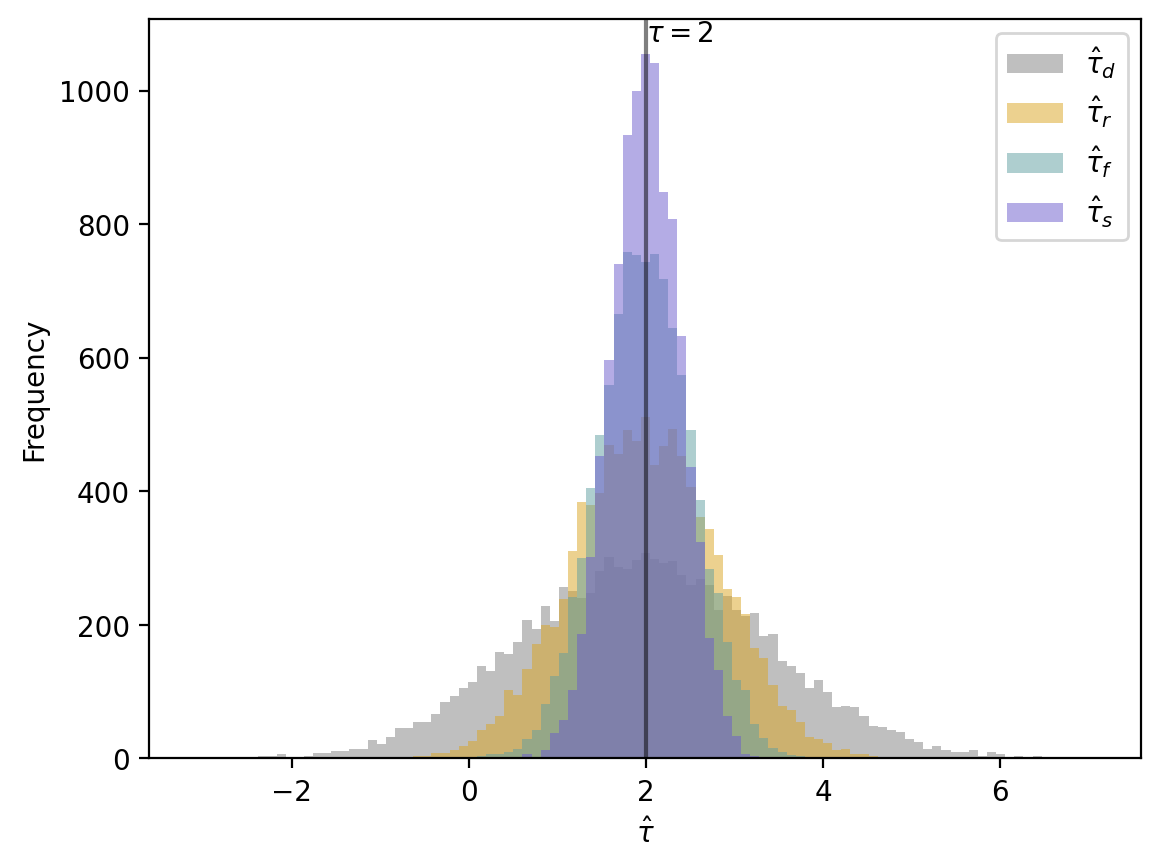

Sample size: 10 ATE_d: 1.9907456748309251 ATE_r: 2.000801158095896 ATE_ml: 1.9947556469650656 ATE_s: 1.9973515868808565
Var_d: 1.894211150049271 Var_red_r: 0.6465137286213885 Var_red_ml:  0.8521747922818484 Var__red_s: 0.9207808989159388


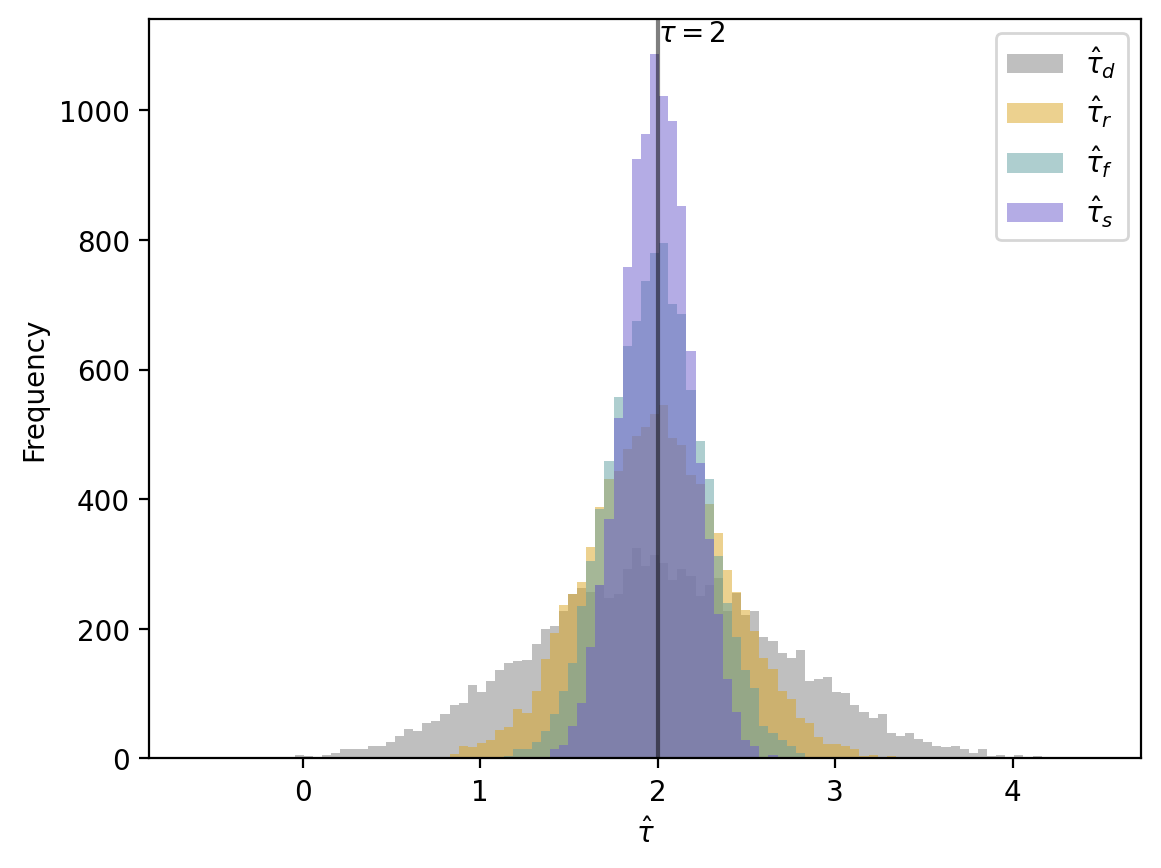

Sample size: 40 ATE_d: 1.9938993912878311 ATE_r: 1.9954103948708908 ATE_ml: 1.9961257756647233 ATE_s: 1.9966862290483873
Var_d: 0.47763401966865104 Var_red_r: 0.6727858683029291 Var_red_ml:  0.8519312403696959 Var__red_s: 0.9240106126421416


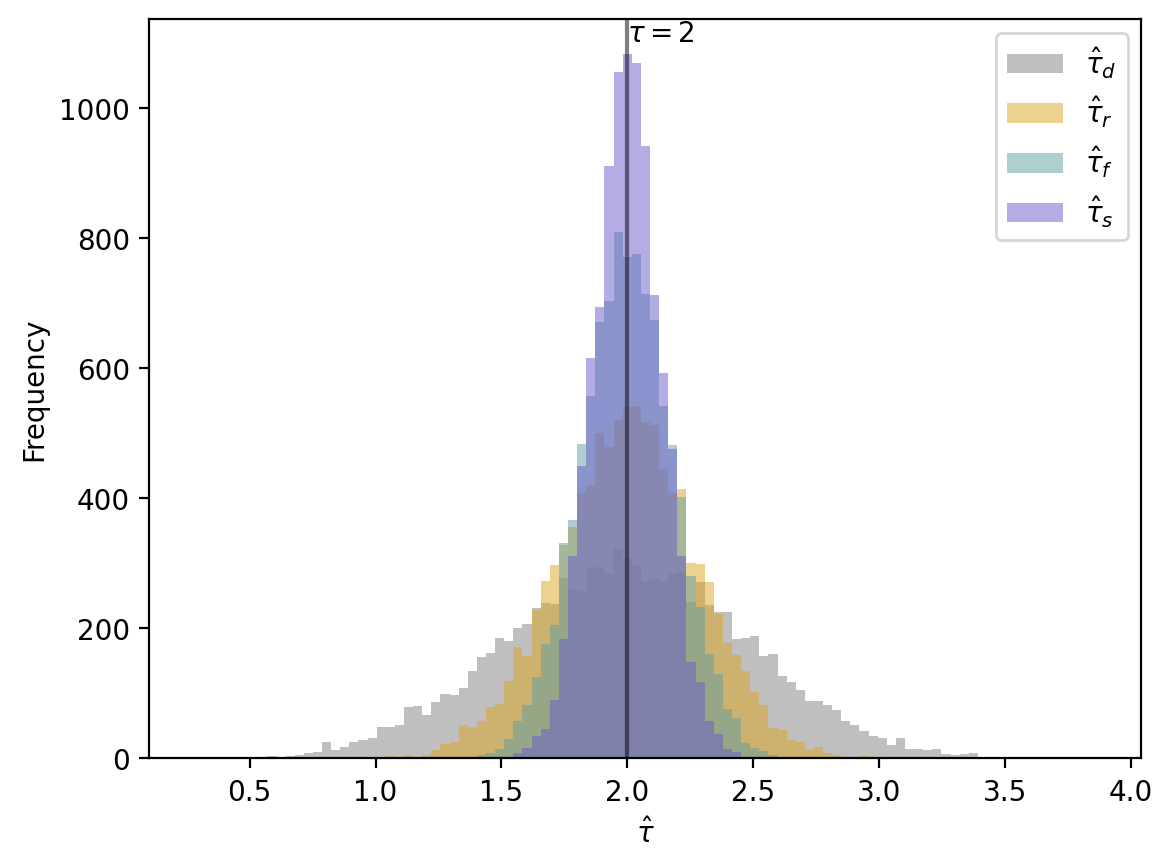

Sample size: 80 ATE_d: 1.9965772002000388 ATE_r: 2.000386409187029 ATE_ml: 1.9991895979014727 ATE_s: 2.000496052941029
Var_d: 0.2309112838107189 Var_red_r: 0.6641409423702075 Var_red_ml:  0.8523190935639511 Var__red_s: 0.921330761507416


In [12]:
colors = {'two': 'gray', 'reg': 'goldenrod', 'ml': 'cadetblue', 'mix': 'slateblue'}
for key in res:
    plt.figure(dpi=dpi)
    sim_res = res[key]
    # use this to first determine overall range, and manually set max and min with visual analysis
    bins_max = max(max(sim_res['two_est']),max(sim_res['reg_est']),max(sim_res['ml_est']),max(sim_res['s_est']))
    bins_min = min(min(sim_res['two_est']),min(sim_res['reg_est']),min(sim_res['ml_est']),min(sim_res['s_est']))
    #bins_max = 7
    #bins_min = -3
    bins_freq = 100
    bins_range = np.arange(bins_min, bins_max, (bins_max - bins_min)/bins_freq)
    plt.hist(sim_res['two_est'], bins = bins_range, color = colors['two'], label = r"$\hat{\tau}_d$", alpha=0.5)
    plt.hist(sim_res['reg_est'], bins = bins_range, color = colors['reg'], label=r"$\hat{\tau}_r$",alpha=0.5)
    plt.hist(sim_res['ml_est'], bins = bins_range, color = colors['ml'], label=r"$\hat{\tau}_{f}$",alpha=0.5)
    plt.hist(sim_res['s_est'], bins = bins_range, color = colors['mix'], label=r"$\hat{\tau}_{s}$",alpha=0.5)
    top_loc = plt.gca().get_ylim()[1]
    plt.text(te, top_loc, r"$\tau = 2$",verticalalignment='top')
    plt.axvline(te, color = 'black', linestyle='-',alpha=0.5)
    plt.ylabel("Frequency")
    plt.xlabel(r"$\hat{\tau}$")
    plt.legend(loc=1)
    plt.savefig("plots/sec_" + str(key) + "_ate.png")
    plt.show()
    print("Sample size:",sample_sizes[key], "ATE_d:", np.mean(sim_res['two_est']), "ATE_r:", 
          np.mean(sim_res['reg_est']),"ATE_ml:",np.mean(sim_res['ml_est']),"ATE_s:",np.mean(sim_res['s_est']))
    print("Var_d:", np.var(sim_res['two_est'],ddof=1), "Var_red_r:", 1-np.var(sim_res['reg_est'],ddof=1)/np.var(sim_res['two_est'],ddof=1),
      "Var_red_ml: ", 1-np.var(sim_res['ml_est'],ddof=1)/np.var(sim_res['two_est'],ddof=1),
      "Var__red_s:", 1-np.var(sim_res['s_est'],ddof=1)/np.var(sim_res['two_est'],ddof=1))

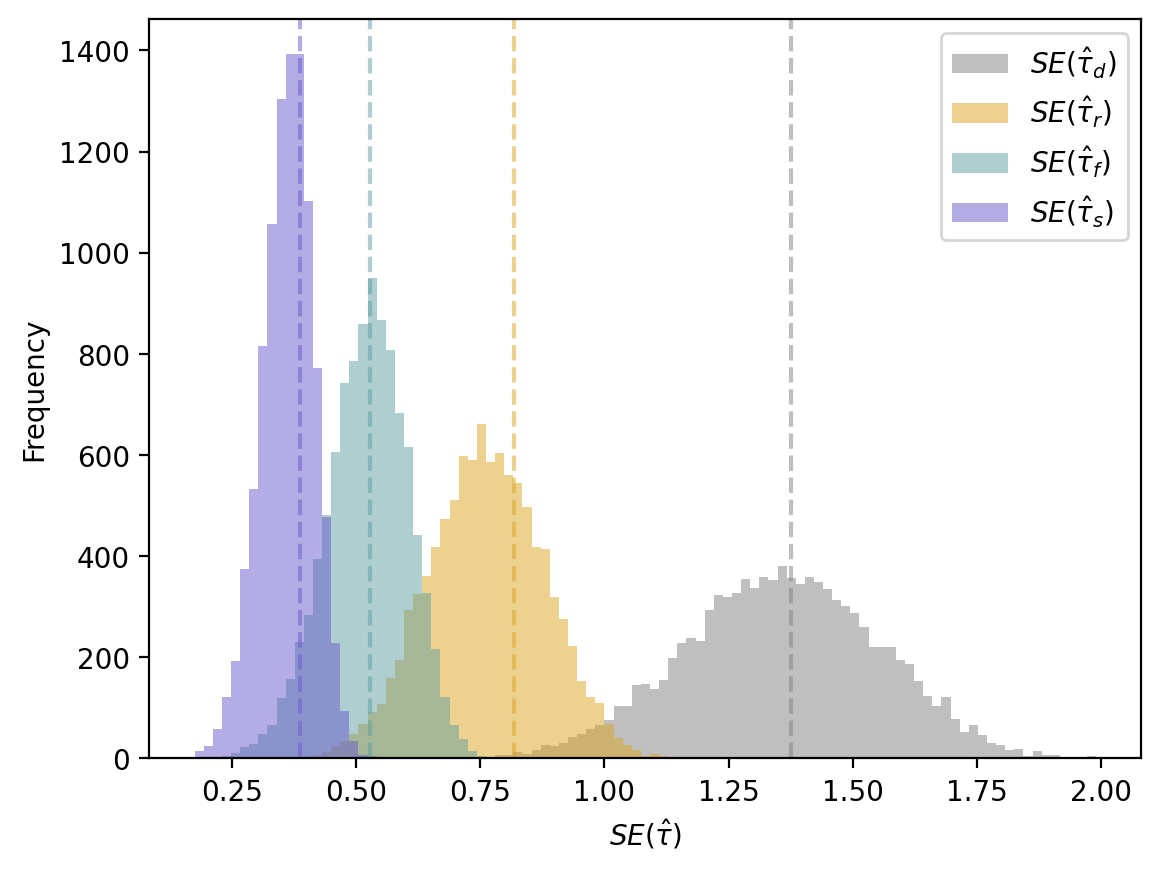

Std_d: 1.3763034367643172 Std_r: 0.8182772370258801 Std_ml:  0.5291617491070875 Std_s: 0.38737282373742854 Var_red: 0.7185411200831263


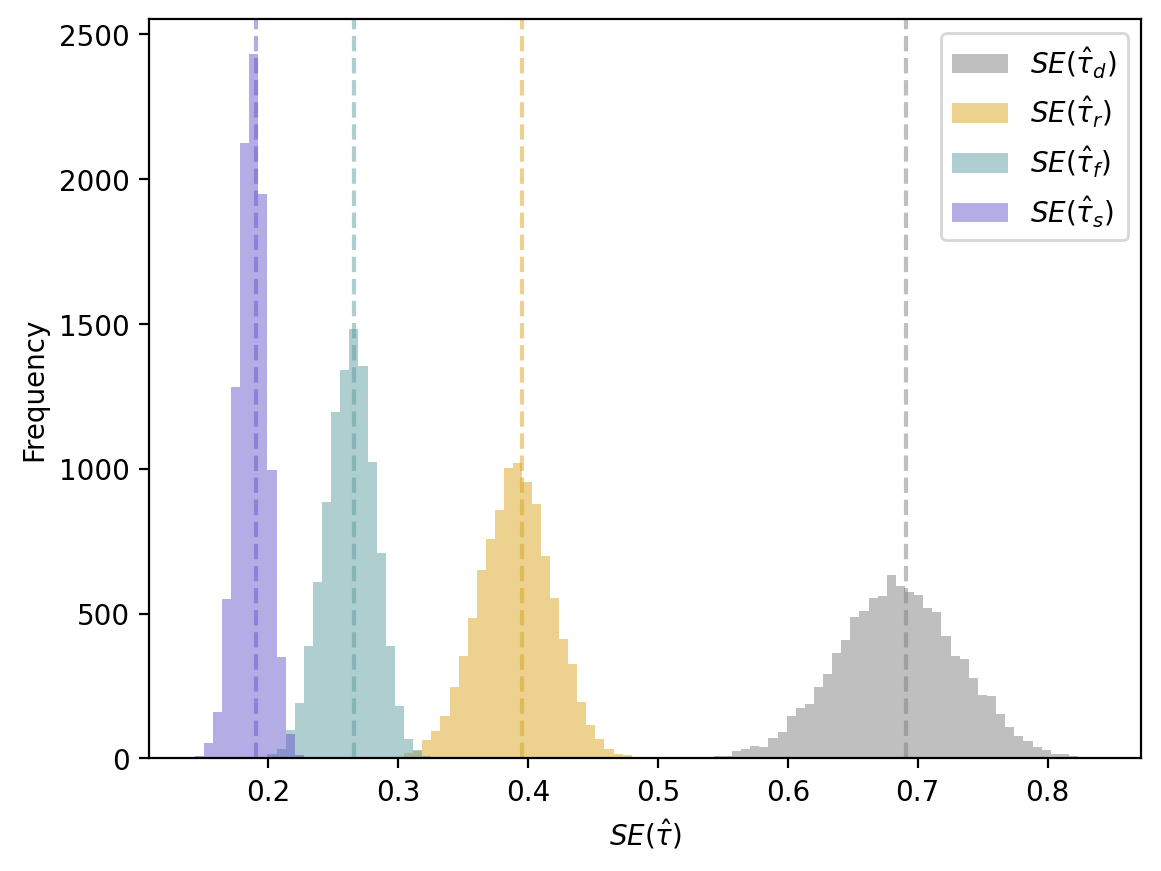

Std_d: 0.691110714479707 Std_r: 0.39533353135657406 Std_ml:  0.26593735512254274 Std_s: 0.1905127726318949 Var_red: 0.7243382736797537


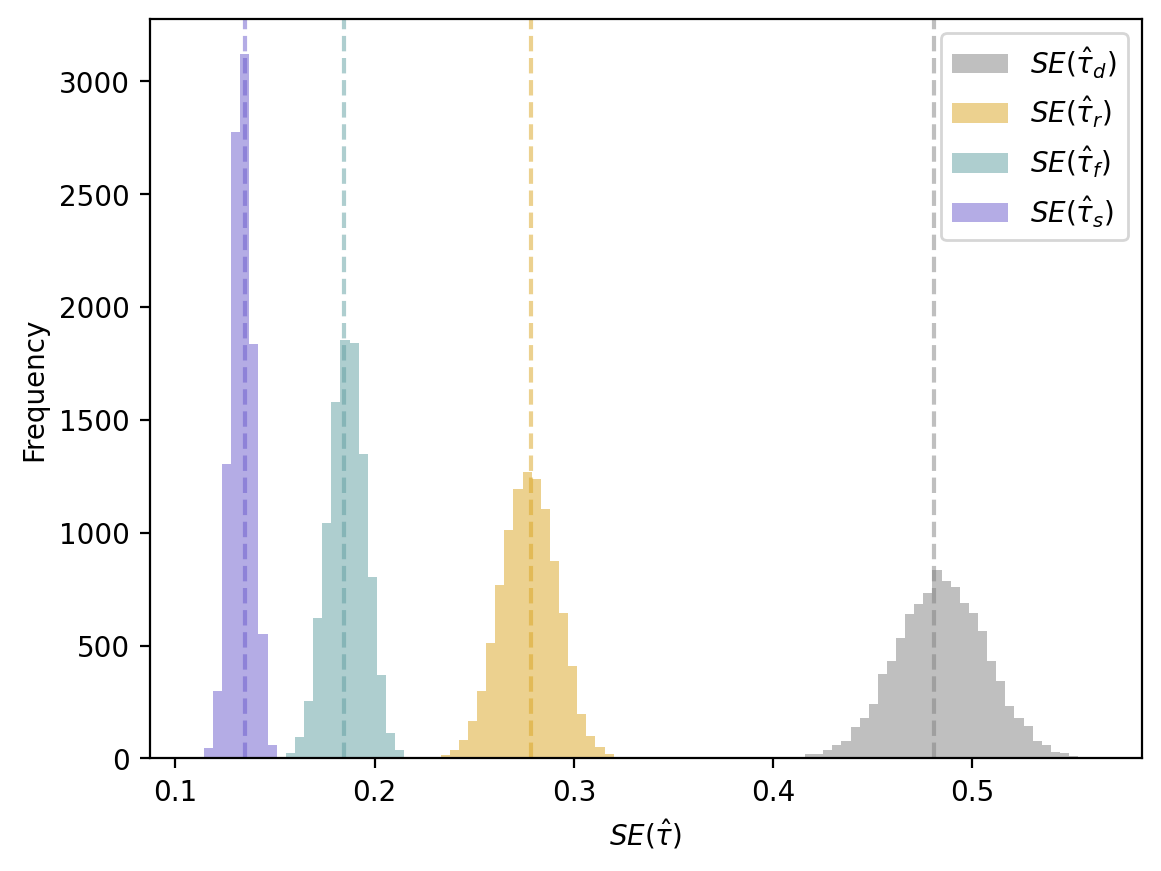

Std_d: 0.48053229216226345 Std_r: 0.27848455285123735 Std_ml:  0.18466506897482998 Std_s: 0.1347798755628384 Var_red: 0.7195196290422732


In [13]:
for key in res:
    plt.figure(dpi=dpi)
    sim_res = res[key]
    # use this to first determine overall range, and manually set max and min with visual analysis
    bins_max = max(max(sim_res['two_se']),max(sim_res['reg_se']),max(sim_res['ml_se']),max(sim_res['s_se']))
    bins_min = min(min(sim_res['two_se']),min(sim_res['reg_se']),min(sim_res['ml_se']),min(sim_res['s_se']))
    #bins_max = 2
    #bins_min = 0.25
    bins_freq = 100
    bins_range = np.arange(bins_min, bins_max, (bins_max - bins_min)/bins_freq)
    plt.hist(sim_res['two_se'], bins = bins_range, color = colors['two'], label = r"$SE(\hat{\tau}_d)$", alpha=0.5)
    plt.hist(sim_res['reg_se'], bins = bins_range, color = colors['reg'], label=r"$SE(\hat{\tau}_r)$",alpha=0.5)
    plt.hist(sim_res['ml_se'], bins = bins_range, color = colors['ml'], label=r"$SE(\hat{\tau}_{f})$",alpha=0.5)
    plt.hist(sim_res['s_se'], bins = bins_range, color = colors['mix'], label=r"$SE(\hat{\tau}_{s})$",alpha=0.5)
    plt.axvline(np.std(sim_res['two_est']), color = colors['two'], linestyle='--',alpha=0.5)
    plt.axvline(np.std(sim_res['reg_est']), color = colors['reg'], linestyle='--',alpha=0.5)
    plt.axvline(np.std(sim_res['ml_est']), color = colors['ml'], linestyle='--',alpha=0.5)
    plt.axvline(np.std(sim_res['s_est']), color = colors['mix'], linestyle='--',alpha=0.5)
    plt.ylabel("Frequency")
    plt.xlabel(r"$SE(\hat{\tau})$")
    plt.legend(loc=1)
    plt.savefig("plots/sec_" + str(key) + "_se.png")
    plt.show()
    print("Std_d:", np.std(sim_res['two_est'],ddof=1), "Std_r:", np.std(sim_res['reg_est'],ddof=1), "Std_ml: ", np.std(sim_res['ml_est'],ddof=1),
          "Std_s:", np.std(sim_res['s_est'],ddof=1),"Var_red:", 1-np.std(sim_res['s_est'],ddof=1)/np.std(sim_res['two_est'],ddof=1))

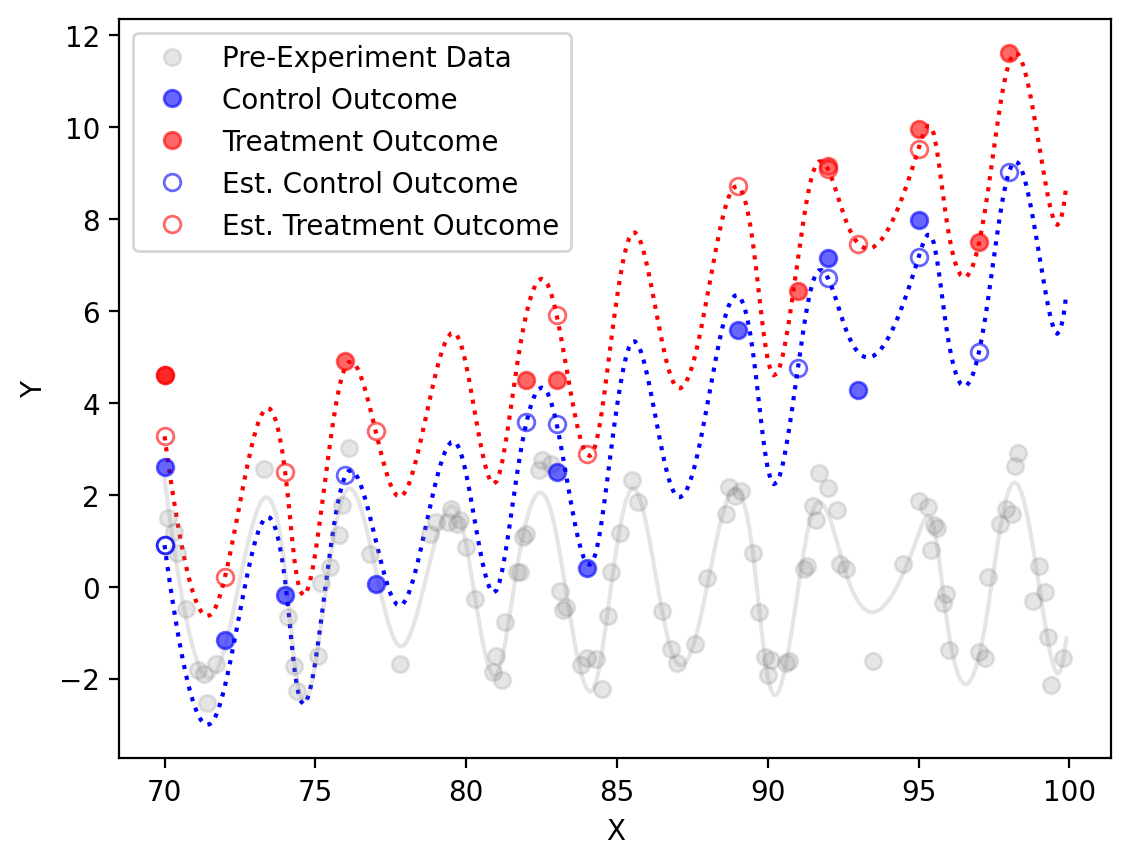

ATE:  2.368697745263219 SE:  0.4060573641894767


In [14]:
# use the same control/treatment data as the linear model example
plt.figure(dpi=dpi)
np.random.seed(1)
random.seed(1)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = exp_data(x)
te = 2
control_idx = random.choices(range(n),k=small_sample_size)
treat_idx = random.choices(range(n), k=small_sample_size)
control_idx.sort()
treat_idx.sort()
control_x = x[control_idx]
treat_x = x[treat_idx]
control_y = y[control_idx]
treat_y = y[treat_idx] + te
def pre_exp2(x):
    return 2*np.sin(x*2) + 0.01*((x - 70)**2)
def pre_exp3(x):
    return 2*np.sin(x*2)

#x = np.arange(70,100,0.1)
#y = pre_exp(x)
#plt.plot(x,y, label = 'ML Predictions',color='grey')
#x_pre = np.array(random.sample(list(np.arange(70,100,0.1)), 100))
#x_pre.sort()
y_pre = pre_exp3(x_pre) + np.random.normal(0,1,len(x_pre)) * 0.5
tck = splrep(x_pre, y_pre, s=20)

treat_pred = BSpline(*tck)(treat_x)
control_pred = BSpline(*tck)(control_x)

treatxvar = np.var(treat_x)
controlxvar = np.var(control_x)
control_r = control_y - control_pred
treat_r = treat_y - treat_pred
treatxcov = np.cov(treat_x, treat_r)[0,1]
controlxcov = np.cov(control_x, control_r)[0,1]
beta = (treatxcov + controlxcov)/(treatxvar + controlxvar)
alpha1 = np.mean(treat_r) - np.mean(treat_x)*beta
alpha0 = np.mean(control_r) - np.mean(control_x)*beta

x = np.arange(70,100,0.1)
treatline = BSpline(*tck)(x) + alpha1 + x * beta
controlline = BSpline(*tck)(x) + alpha0 + x * beta
plt.plot(x,treatline, color='red',linestyle='dotted')
plt.plot(x,controlline, color='blue',linestyle='dotted')
plt.plot(x,BSpline(*tck)(x), color='grey',alpha=weak_alpha)
plt.plot(x_pre, y_pre, 'o',color='grey',label="Pre-Experiment Data",alpha=weak_alpha)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=strong_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=strong_alpha)
plt.plot(treat_x, alpha0 + treat_x * beta + BSpline(*tck)(treat_x),'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=strong_alpha)
plt.plot(control_x, alpha1 + control_x * beta + BSpline(*tck)(control_x),'o',fillstyle='none',color='red',label='Est. Treatment Outcome',alpha=strong_alpha)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc=2)
plt.savefig("plots/sec2_cf.png")
plt.show()
ATE = alpha1 - alpha0
SE = (np.var(treat_y - BSpline(*tck)(treat_x) - treat_x * beta)/len(treat_y) + np.var(control_y - BSpline(*tck)(control_x) - control_x * beta)/len(control_y))**0.5
print("ATE: ", ATE, "SE: ", SE)

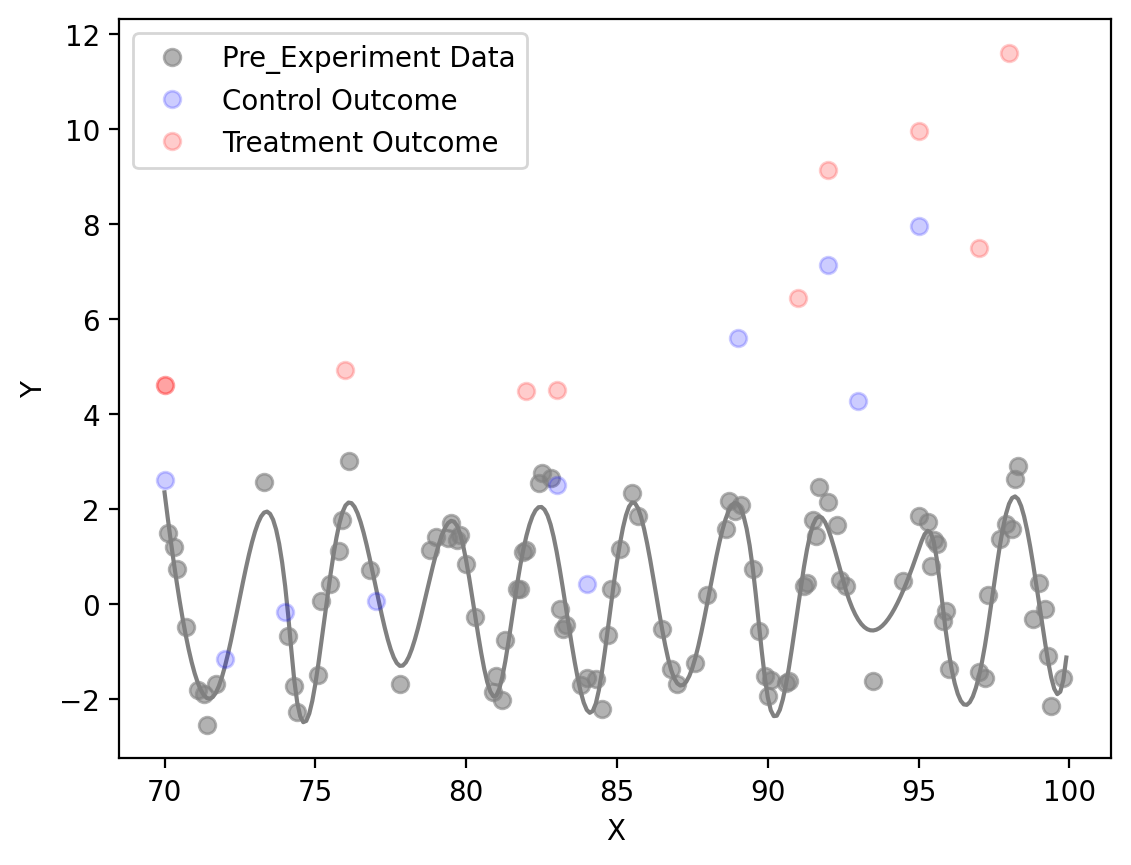

In [15]:
plt.figure(dpi=dpi)
#plt.plot(x,treatline, color='red',linestyle='--',alpha=0.2)
#plt.plot(x,controlline, color='blue',linestyle='--',alpha=0.2)
plt.plot(x,BSpline(*tck)(x), color='grey',alpha=1)
plt.plot(x_pre, y_pre, 'o',color='grey',label="Pre_Experiment Data",alpha=strong_alpha)
plt.plot(control_x, control_y, 'o', color = 'blue', label='Control Outcome',alpha=weak_alpha)
plt.plot(treat_x, treat_y, 'o', color = 'red', label = 'Treatment Outcome',alpha=weak_alpha)
#plt.plot(treat_x, alpha0 + treat_x * beta + BSpline(*tck)(treat_x),'o',fillstyle='none',color='blue',label='Est. Control Outcome',alpha=0.2)
#plt.plot(control_x, alpha1 + control_x * beta + BSpline(*tck)(control_x),'o',fillstyle='none',color='red',label='Est. Treatment Outcome',alpha=0.2)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc=2)
plt.savefig("plots/sec2_preexp.png")

In [16]:
np.random.seed(1)
random.seed(1)
sim_num = 10000
#sample_sizes = {1: 10, 2: 40, 3:80}
res = {}
# define the original x and y (without treatment)
x = np.arange(70,100,1)
n = len(x)
error = np.random.normal(0,1,n)
y = exp_data(x)
te = 2
for key in sample_sizes:
    temp = []
    n0 = sample_sizes[key]
    n1 = sample_sizes[key]
    for i in range(sim_num):
        #control_idx = random.sample(range(n),n//2)
        #treat_idx = list(set(range(n)).difference(control_idx))
        # or if with replacement
        control_idx = random.choices(range(n), k=n0)
        treat_idx = random.choices(range(n), k=n1)
        control_idx.sort()
        treat_idx.sort()
        control_x = x[control_idx]
        treat_x = x[treat_idx]
        control_y = y[control_idx]
        treat_y = y[treat_idx] + te

        # perform difference in means
        two_est = np.mean(treat_y) - np.mean(control_y)
        two_se = (np.var(treat_y,ddof=1)/n1 + np.var(control_y,ddof=1)/n0)**0.5

        # perform counterfactual estimator with regression
        treatxvar = np.var(treat_x)
        controlxvar = np.var(control_x)
        treatxcov = np.cov(treat_x, treat_y)[0,1]
        controlxcov = np.cov(control_x, control_y)[0,1]
        beta = (treatxcov + controlxcov)/(treatxvar + controlxvar)
        alpha1 = np.mean(treat_y) - np.mean(treat_x)*beta
        alpha0 = np.mean(control_y) - np.mean(control_x)*beta
        reg_est = alpha1 - alpha0
        reg_se = (np.var(treat_y - treat_x * beta,ddof=1)/len(treat_y) + np.var(control_y - control_x * beta,ddof=1)/len(control_y))**0.5
        
        # perform counterfactual estimator with ML
        treat_preds = BSpline(*tck)(treat_x)
        control_preds = BSpline(*tck)(control_x)
        pred_alpha1 = np.mean(treat_y - treat_preds)
        pred_alpha0 = np.mean(control_y - control_preds)
        ml_est = pred_alpha1 - pred_alpha0
        ml_se = (np.var(treat_y - treat_preds,ddof=1)/len(treat_y) + np.var(control_y - control_preds,ddof=1)/len(control_y))**0.5
        
        # perform secondary linear adjustment to ML
        control_r = control_y - control_preds
        treat_r = treat_y - treat_preds
        treatxcovr = np.cov(treat_x, treat_r)[0,1]
        controlxcovr = np.cov(control_x, control_r)[0,1]
        beta_s = (treatxcovr + controlxcovr)/(treatxvar + controlxvar)
        alpha1_s = np.mean(treat_r) - np.mean(treat_x)*beta_s
        alpha0_s = np.mean(control_r) - np.mean(control_x)*beta_s
        s_est = alpha1_s - alpha0_s
        s_se = (np.var(treat_r - treat_x * beta_s,ddof=1)/len(treat_y) + np.var(control_r - control_x * beta_s,ddof=1)/len(control_y))**0.5

        temp.append([two_est, two_se, reg_est, reg_se, ml_est, ml_se, s_est, s_se])

    res[key] = pd.DataFrame(temp, columns = ['two_est','two_se','reg_est','reg_se','ml_est','ml_se','s_est','s_se'])

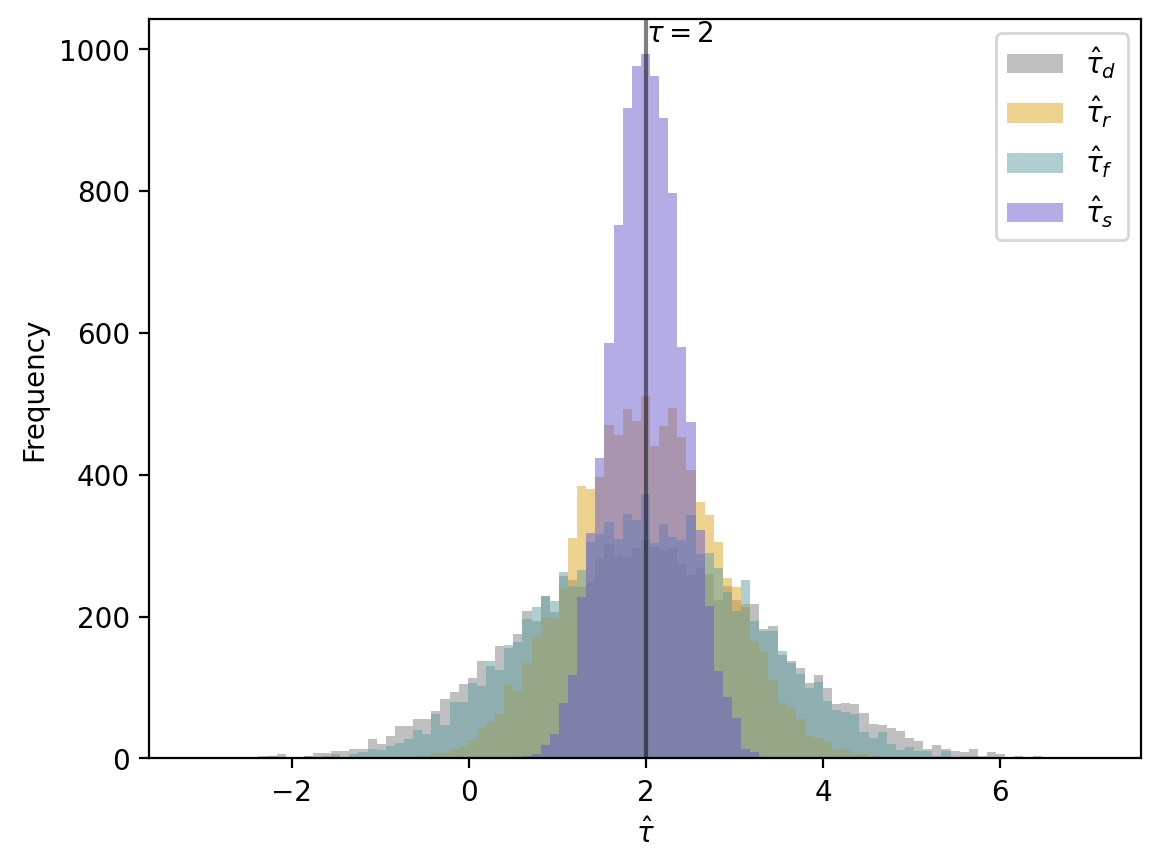

Sample size: 10 ATE_d: 1.9907456748309251 ATE_r: 2.000801158095896 ATE_ml: 1.9900416469650657 ATE_s: 1.9978753646586345
Var_d: 1.894211150049271 Var_red_r: 0.6465137286213885 Var_red_ml:  0.23196173235596884 Var__red_s: 0.9132160621595784


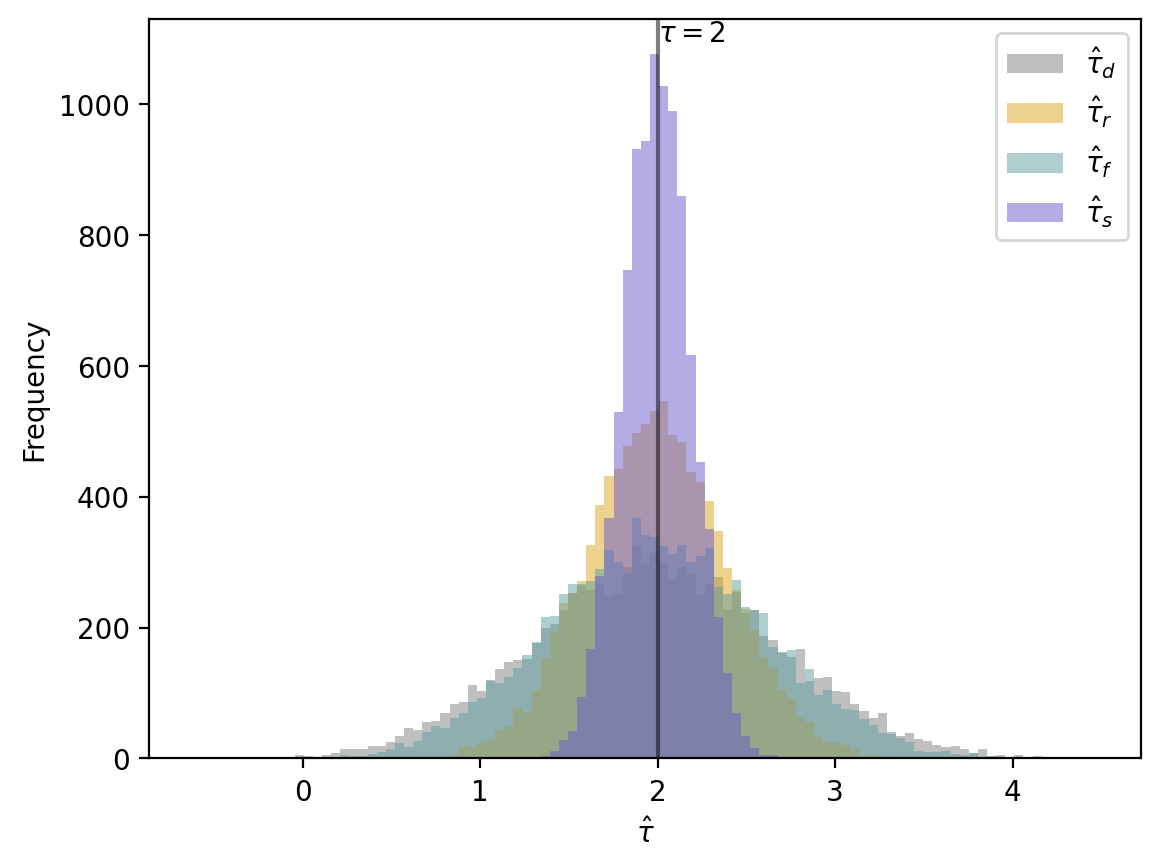

Sample size: 40 ATE_d: 1.9938993912878311 ATE_r: 1.9954103948708908 ATE_ml: 1.995723275664723 ATE_s: 1.996696549561208
Var_d: 0.47763401966865104 Var_red_r: 0.6727858683029291 Var_red_ml:  0.21933906681589432 Var__red_s: 0.9235905896368299


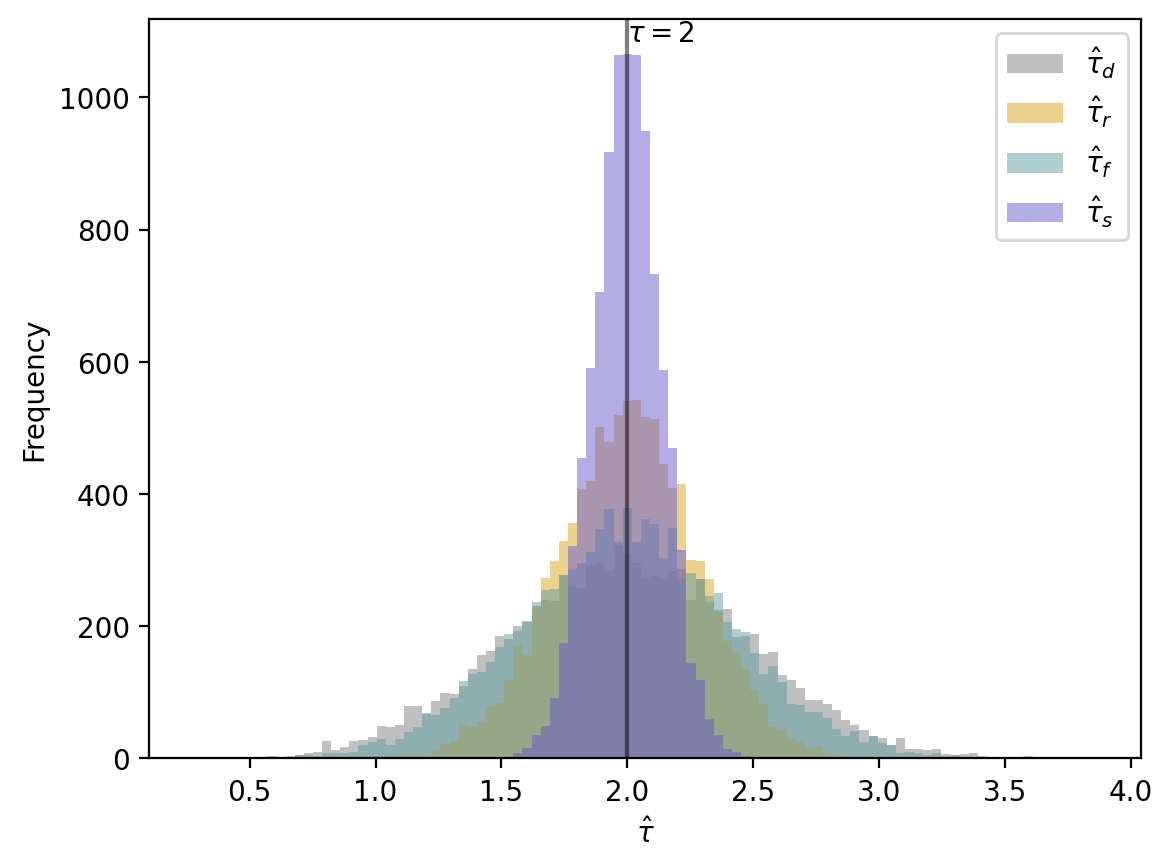

Sample size: 80 ATE_d: 1.9965772002000388 ATE_r: 2.000386409187029 ATE_ml: 1.9966993479014732 ATE_s: 2.000527575092928
Var_d: 0.2309112838107189 Var_red_r: 0.6641409423702075 Var_red_ml:  0.22749782036698574 Var__red_s: 0.921157117210229


In [17]:
for key in res:
    plt.figure(dpi=dpi)
    sim_res = res[key]
    # use this to first determine overall range, and manually set max and min with visual analysis
    bins_max = max(max(sim_res['two_est']),max(sim_res['reg_est']),max(sim_res['ml_est']),max(sim_res['s_est']))
    bins_min = min(min(sim_res['two_est']),min(sim_res['reg_est']),min(sim_res['ml_est']),min(sim_res['s_est']))
    #bins_max = 7
    #bins_min = -3
    bins_freq = 100
    bins_range = np.arange(bins_min, bins_max, (bins_max - bins_min)/bins_freq)
    plt.hist(sim_res['two_est'], bins = bins_range, color = colors['two'], label = r"$\hat{\tau}_d$", alpha=0.5)
    plt.hist(sim_res['reg_est'], bins = bins_range, color = colors['reg'], label=r"$\hat{\tau}_r$",alpha=0.5)
    plt.hist(sim_res['ml_est'], bins = bins_range, color = colors['ml'], label=r"$\hat{\tau}_{f}$",alpha=0.5)
    plt.hist(sim_res['s_est'], bins = bins_range, color = colors['mix'], label=r"$\hat{\tau}_{s}$",alpha=0.5)
    top_loc = plt.gca().get_ylim()[1]
    plt.text(te, top_loc, r"$\tau = 2$",verticalalignment='top')
    plt.axvline(te, color = 'black', linestyle='-',alpha=0.5)
    plt.ylabel("Frequency")
    plt.xlabel(r"$\hat{\tau}$")
    plt.legend(loc=1)
    plt.savefig("plots/sec2_" + str(key) + "_ate.png")
    plt.show()
    print("Sample size:",sample_sizes[key], "ATE_d:", np.mean(sim_res['two_est']), "ATE_r:", 
          np.mean(sim_res['reg_est']),"ATE_ml:",np.mean(sim_res['ml_est']),"ATE_s:",np.mean(sim_res['s_est']))
    print("Var_d:", np.var(sim_res['two_est'],ddof=1), "Var_red_r:", 1-np.var(sim_res['reg_est'],ddof=1)/np.var(sim_res['two_est'],ddof=1),
      "Var_red_ml: ", 1-np.var(sim_res['ml_est'],ddof=1)/np.var(sim_res['two_est'],ddof=1),
      "Var__red_s:", 1-np.var(sim_res['s_est'],ddof=1)/np.var(sim_res['two_est'],ddof=1))

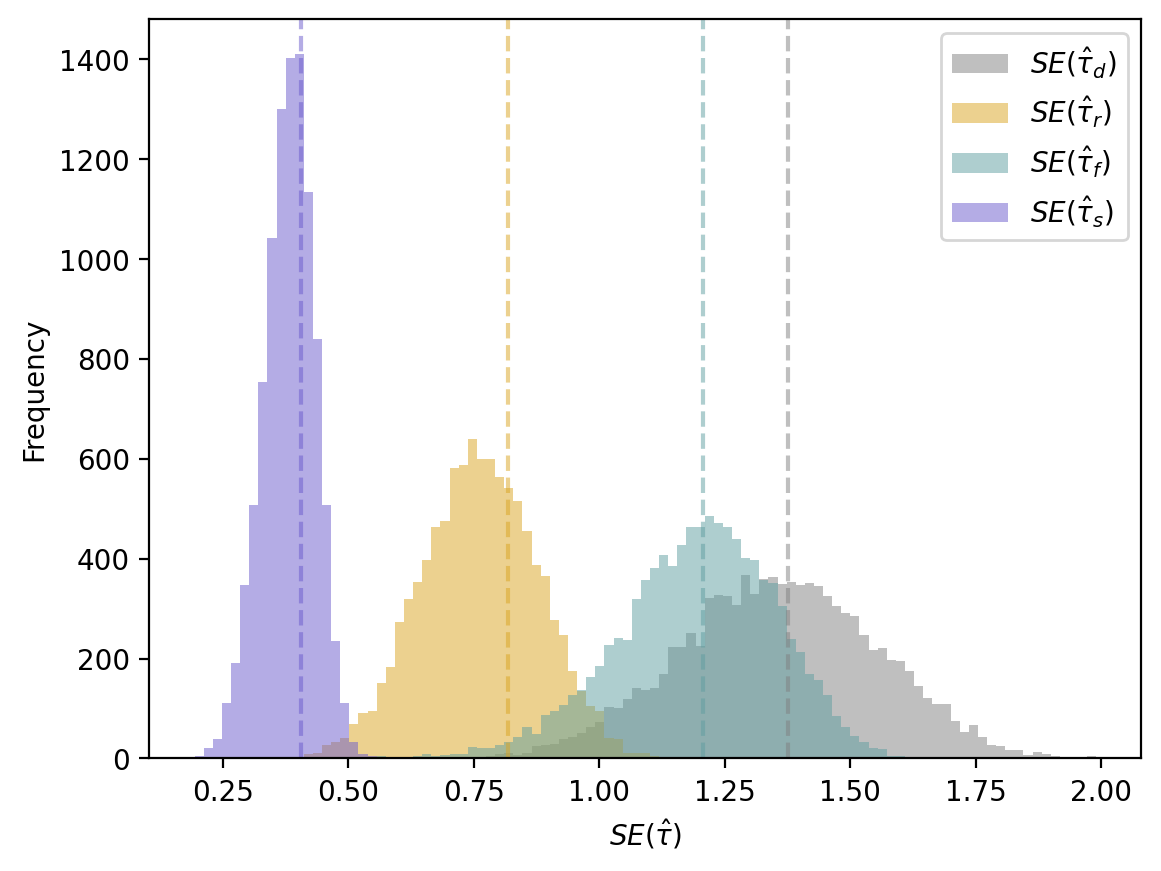

Std_d: 1.3763034367643172 Std_r: 0.8182772370258801 Std_ml:  1.2061619502520589 Std_s: 0.405446793923086 Var_red: 0.7054088632690698


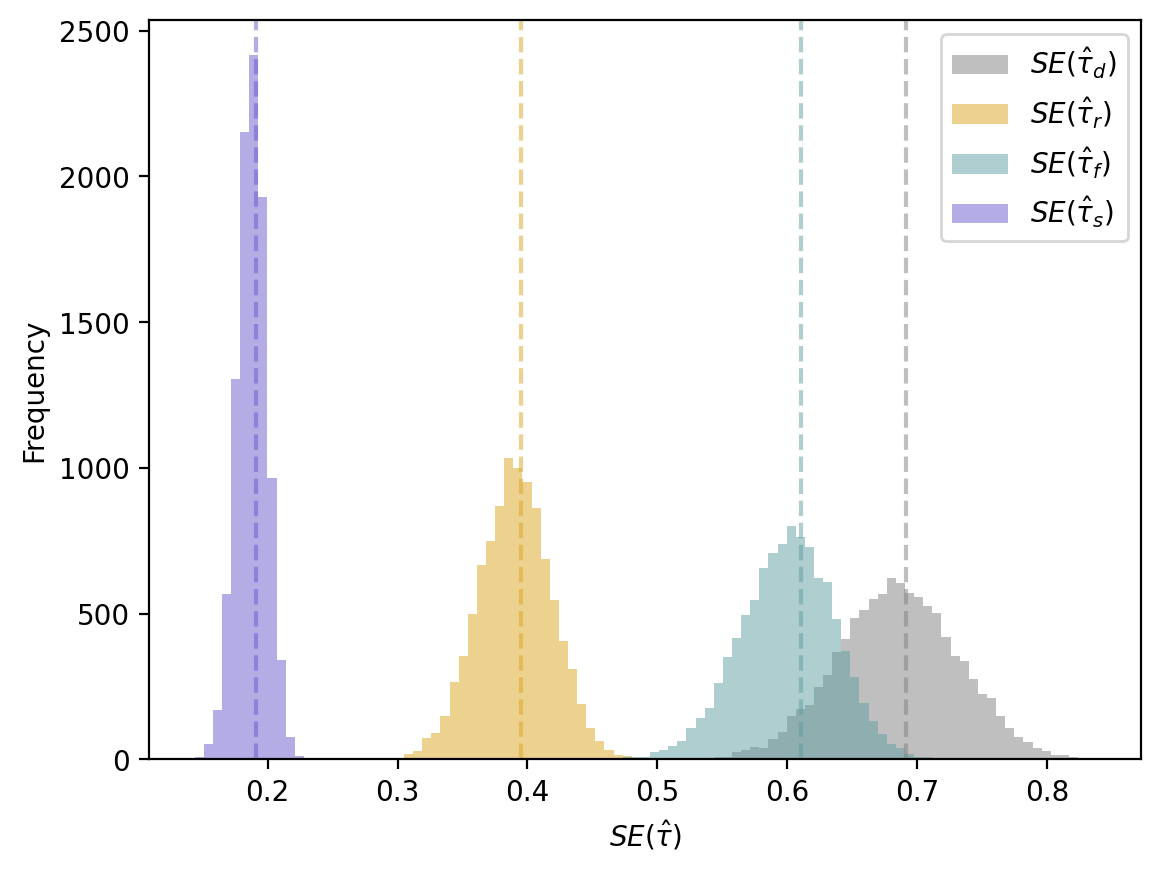

Std_d: 0.691110714479707 Std_r: 0.39533353135657406 Std_ml:  0.610631001108693 Std_s: 0.19103856629558447 Var_red: 0.7235774785529042


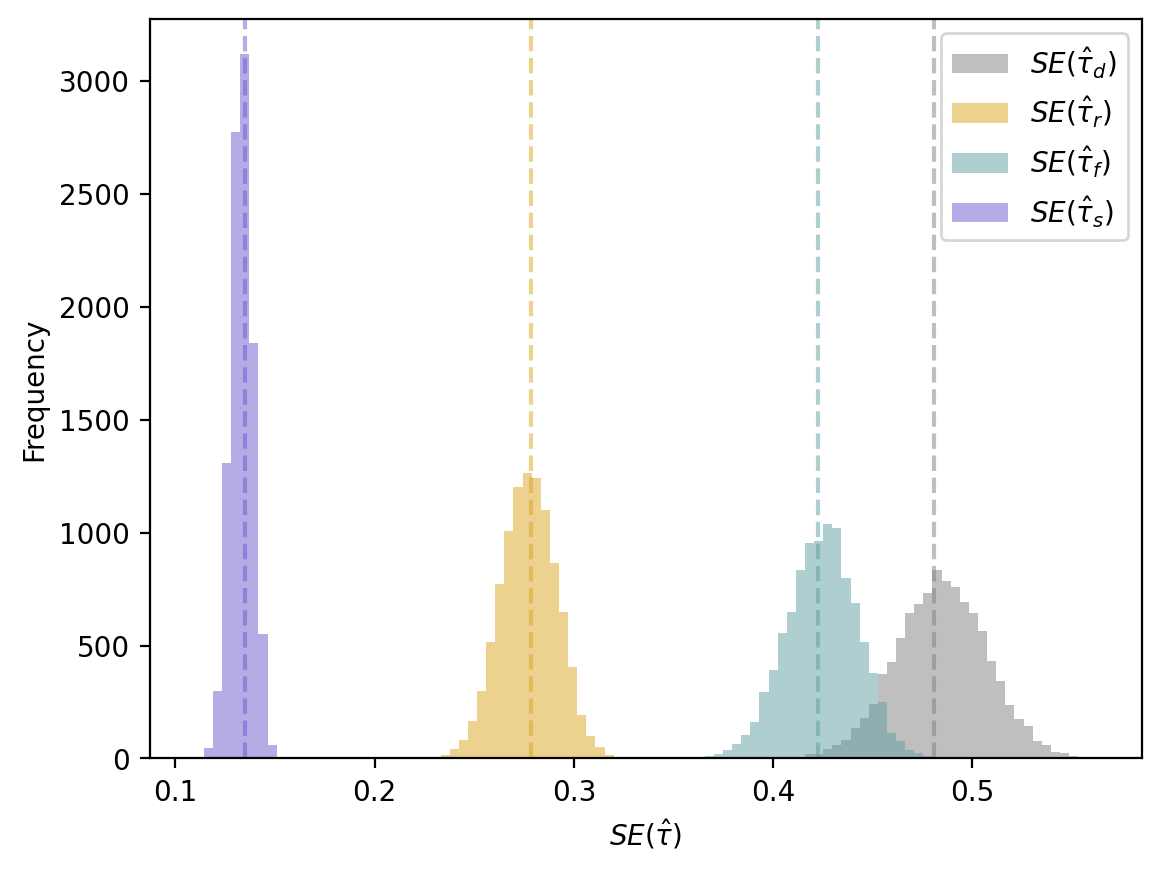

Std_d: 0.48053229216226345 Std_r: 0.27848455285123735 Std_ml:  0.4223499379017806 Std_s: 0.13492854139997243 Var_red: 0.719210251629852


In [18]:
for key in res:
    plt.figure(dpi=dpi)
    sim_res = res[key]
    # use this to first determine overall range, and manually set max and min with visual analysis
    bins_max = max(max(sim_res['two_se']),max(sim_res['reg_se']),max(sim_res['ml_se']),max(sim_res['s_se']))
    bins_min = min(min(sim_res['two_se']),min(sim_res['reg_se']),min(sim_res['ml_se']),min(sim_res['s_se']))
    #bins_max = 2
    #bins_min = 0.25
    bins_freq = 100
    bins_range = np.arange(bins_min, bins_max, (bins_max - bins_min)/bins_freq)
    plt.hist(sim_res['two_se'], bins = bins_range, color = colors['two'], label = r"$SE(\hat{\tau}_d)$", alpha=0.5)
    plt.hist(sim_res['reg_se'], bins = bins_range, color = colors['reg'], label=r"$SE(\hat{\tau}_r)$",alpha=0.5)
    plt.hist(sim_res['ml_se'], bins = bins_range, color = colors['ml'], label=r"$SE(\hat{\tau}_{f})$",alpha=0.5)
    plt.hist(sim_res['s_se'], bins = bins_range, color = colors['mix'], label=r"$SE(\hat{\tau}_{s})$",alpha=0.5)
    plt.axvline(np.std(sim_res['two_est']), color = colors['two'], linestyle='--',alpha=0.5)
    plt.axvline(np.std(sim_res['reg_est']), color = colors['reg'], linestyle='--',alpha=0.5)
    plt.axvline(np.std(sim_res['ml_est']), color = colors['ml'], linestyle='--',alpha=0.5)
    plt.axvline(np.std(sim_res['s_est']), color = colors['mix'], linestyle='--',alpha=0.5)
    plt.ylabel("Frequency")
    plt.xlabel(r"$SE(\hat{\tau})$")
    plt.legend(loc=1)
    plt.savefig("plots/sec2_" + str(key) + "_se.png")
    plt.show()
    print("Std_d:", np.std(sim_res['two_est'],ddof=1), "Std_r:", np.std(sim_res['reg_est'],ddof=1), "Std_ml: ", np.std(sim_res['ml_est'],ddof=1),
          "Std_s:", np.std(sim_res['s_est'],ddof=1),"Var_red:", 1-np.std(sim_res['s_est'],ddof=1)/np.std(sim_res['two_est'],ddof=1))

In [23]:
# when doing examples with the insurance data, maybe add some constant factor to
# outcomes with certain covariate (e.g. males) only in experiment data 
# to simulate differences in pre- and in- experiment data